## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[[ 0.09762701  0.43037873  0.20552675  0.08976637 -0.1526904   0.29178823
  -0.12482558  0.783546    0.92732552 -0.23311696]
 [ 0.58345008  0.05778984  0.13608912  0.85119328 -0.85792788 -0.8257414
  -0.95956321  0.66523969  0.5563135   0.7400243 ]
 [ 0.95723668  0.59831713 -0.07704128  0.56105835 -0.76345115  0.27984204
  -0.71329343  0.88933783  0.04369664 -0.17067612]
 [-0.47088878  0.54846738 -0.08769934  0.1368679  -0.9624204   0.23527099
   0.22419145  0.23386799  0.88749616  0.3636406 ]
 [-0.2809842  -0.12593609  0.39526239 -0.87954906  0.33353343  0.34127574
  -0.57923488 -0.7421474  -0.3691433  -0.27257846]
 [ 0.14039354 -0.12279697  0.97674768 -0.79591038 -0.58224649 -0.67738096
   0.30621665 -0.49341679 -0.06737845 -0.51114882]
 [-0.68206083 -0.77924972  0.31265918 -0.7236341  -0.60683528 -0.26254966
   0.64198646 -0.80579745  0.67588981 -0.80780318]
 [ 0.95291893 -0.0626976   0.95352218  0.20969104  0.47852716 -0.92162442
  -0.43438607 -0.75960688 -0.4077196  -0.76254456]
 

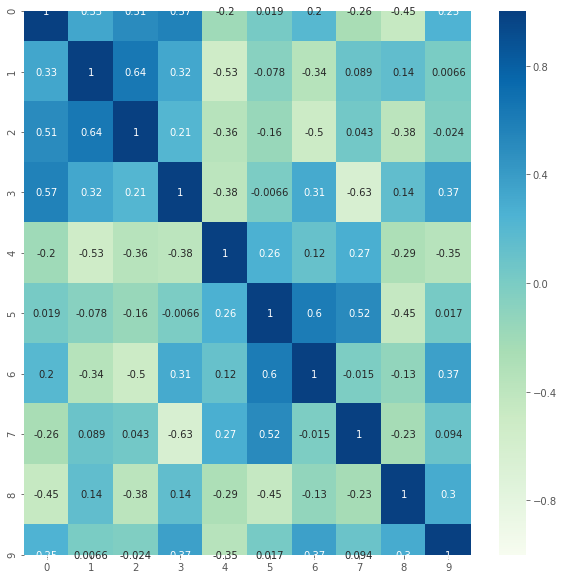

In [3]:

matrix = (np.random.RandomState(0).rand(10,10) - 0.5) * 2
print(matrix)
plt.figure(figsize=(10,10))
ax_heatmap_ = sns.heatmap(np.corrcoef(matrix), cmap="GnBu", annot=True, vmin=-1, vmax=1)
plt.show()

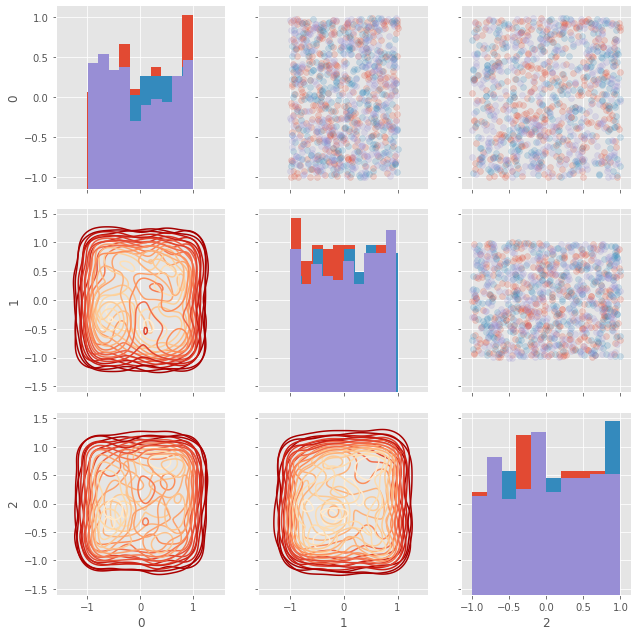

In [5]:
nrow = 1000
ncol = 3

matrix =  (np.random.RandomState(0).rand(1000,3) - 0.5) * 2

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(plt.hist )
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

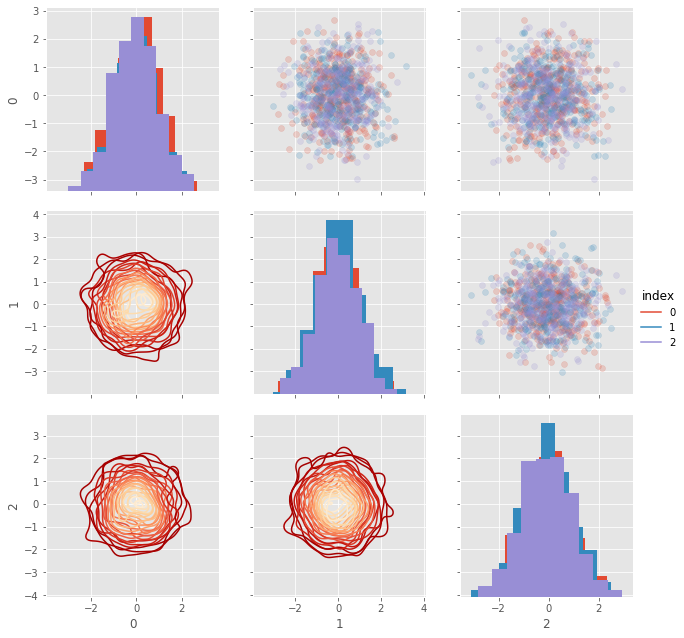

In [6]:
nrow = 1000
ncol = 3

matrix = np.random.RandomState(0).randn(1000,3)

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(plt.hist)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)
grid.add_legend()

plt.show()